In [1]:
import pandas as pd

In [3]:
df_xmatch = pd.read_csv('data/minijpas.xmatch_sdss_dr12.csv', comment='#')
df_xmatch

,angDist,TILE_ID,NUMBER,RAdeg,DEdeg,errHalfMaj,errHalfMin,errPosAng,objID,mode,...,e_zph,avg_zph,pmRA,e_pmRA,pmDE,e_pmDE,SpObjID,spType,spCl,subClass
0,0.620795,2243,14,214.456298,52.691563,0.160,0.143,90.0,1237661385994731630,1,...,0.11424,0.34691,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
1,0.195417,2243,23,214.483009,52.675671,0.015,0.014,90.0,1237661385994731792,1,...,NaN,NaN,-18.5,5.4,7.2,5.4,0,NaN,NaN,NaN
2,0.085461,2243,36,214.607684,52.601935,0.168,0.162,0.0,1237661416065729326,1,...,0.04774,0.57158,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
3,1.171804,2243,107,214.374173,52.744610,0.379,0.332,0.0,1237661385994666180,1,...,0.08879,0.59513,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
4,0.093277,2243,120,214.465073,52.690884,0.103,0.095,90.0,1237661385994731628,1,...,0.07317,0.62198,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19902,0.403196,2406,12190,215.376209,53.468419,0.043,0.039,0.0,1237661387068539789,1,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
19903,0.208520,2406,12191,215.746611,53.249540,0.137,0.117,90.0,1237661387068670830,1,...,0.10021,0.63945,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
19904,0.152638,2406,12200,215.444890,53.427158,0.137,0.113,90.0,1237661387068539974,1,...,0.08223,0.69736,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
19905,0.309366,2406,12201,215.505732,53.390856,0.076,0.075,90.0,1237661387068539882,1,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN


In [5]:
df_xmatch.columns

Index(['angDist', 'TILE_ID', 'NUMBER', 'RAdeg', 'DEdeg', 'errHalfMaj',
       'errHalfMin', 'errPosAng', 'objID', 'mode', 'q_mode', 'class', 'SDSS12',
       'm_SDSS12', 'flags', 'ObsDate', 'Q', 'umag', 'e_umag', 'gmag', 'e_gmag',
       'rmag', 'e_rmag', 'imag', 'e_imag', 'zmag', 'e_zmag', 'zsp', 'e_zsp',
       'f_zsp', 'zph', 'e_zph', 'avg_zph', 'pmRA', 'e_pmRA', 'pmDE', 'e_pmDE',
       'SpObjID', 'spType', 'spCl', 'subClass'],
      dtype='object')

<Axes: >

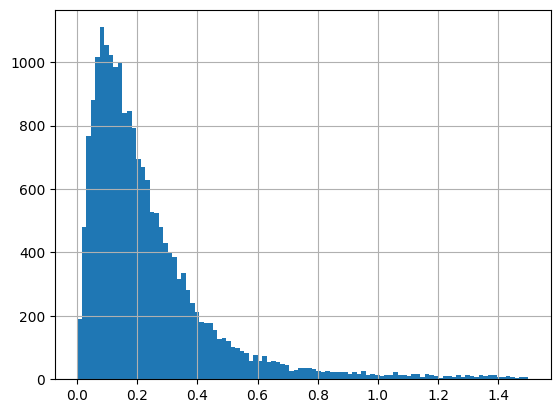

In [4]:
df_xmatch['angDist'].hist(bins=100)

In [8]:
cond_spec = df_xmatch['SpObjID'] != 0
cond_spec.sum()

np.int64(1169)

In [14]:
df_xmatch[cond_spec].value_counts(['spCl'])

spCl  
GALAXY    685
STAR      245
QSO       239
Name: count, dtype: int64